## Emissions Data Cleaning, Filtering, and Analysis

In [2]:
import pandas as pd

In [5]:
e_high = pd.read_csv('emissions_high_granularity.csv')
e_med = pd.read_csv('emissions_medium_granularity.csv')
e_low = pd.read_csv('emissions_low_granularity.csv')

In [ ]:
# Check out the basics of each dataset

In [17]:
e_high.shape # 15797 rows, 16 columns
e_high.head()

,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,0.9125,Million bbl/yr,0.338928,0.005404,0.001299,0.0,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
1,1963,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,1.8250,Million bbl/yr,0.677855,0.010808,0.002598,0.0,0.036508,0.001304,0.049914,0.727770,Abu Dhabi National Oil Company Annual Report 1...
2,1964,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,7.3000,Million bbl/yr,2.711422,0.043233,0.010392,0.0,0.146033,0.005215,0.199657,2.911079,Abu Dhabi National Oil Company Annual Report 1...
3,1965,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,10.9500,Million bbl/yr,4.067132,0.064849,0.015588,0.0,0.219049,0.007823,0.299486,4.366618,Abu Dhabi National Oil Company Annual Report 1...
4,1966,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,13.5050,Million bbl/yr,5.016130,0.079980,0.019225,0.0,0.270160,0.009649,0.369366,5.385495,Abu Dhabi National Oil Company Annual Report 1...


In [23]:
e_med.shape # 12551 rows, 7 columns
e_med.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [29]:
e_low.shape # 6069 rows, 4 columns
e_low.head()

,year,parent_entity,parent_type,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,0.498240
1,1963,Abu Dhabi National Oil Company,State-owned Entity,1.050222
2,1964,Abu Dhabi National Oil Company,State-owned Entity,4.174018
3,1965,Abu Dhabi National Oil Company,State-owned Entity,6.193849
4,1966,Abu Dhabi National Oil Company,State-owned Entity,7.562050


##### Common columns across each dataset include:
* year
* parent_entity
* parent_type
* total_emissions_MtCO2e

##### The high dataset includes much more detailed information, while the low dataset gives a very brief "summary" of the stats.

In [47]:
# Check for null values (as well as how many there are)

In [49]:
print("Count of null values in the Emissions_High Dataset")
e_high.isna().sum().sort_values()

Count of null values in the Emissions_High Dataset


year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
source                                0
dtype: int64

In [51]:
print("Count of null values in the Emissions_Medium Dataset")
e_med.isna().sum().sort_values()

Count of null values in the Emissions_Medium Dataset


year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64

In [53]:
print("Count of null values in the Emissions_Low Dataset")
e_low.isna().sum().sort_values()

Count of null values in the Emissions_Low Dataset


year                      0
parent_entity             0
parent_type               0
total_emissions_MtCO2e    0
dtype: int64

### No null values found in the datasets!

In [58]:
# Remove duplicates
e_high = e_high.drop_duplicates()
e_med = e_med.drop_duplicates()
e_low = e_low.drop_duplicates()

In [62]:
# Sort values by year
e_high = e_high.sort_values(by='year')
e_med = e_med.sort_values(by='year')
e_low = e_low.sort_values(by='year')

In [76]:
# Check first 5 and last 5 values of each dataset to make sure order is good
e_high.tail()
e_med.head()
e_low.head()

,year,parent_entity,parent_type,total_emissions_MtCO2e
4004,2022,Petrobras,State-owned Entity,397.775146
3935,2022,Petoro,State-owned Entity,154.664425
1165,2022,China (Cement),Nation State,1050.000000
895,2022,Cemex,Investor-owned Company,22.492945
6068,2022,YPF,State-owned Entity,69.912869


In [82]:
# See the types of values in important columns

In [86]:
e_high.parent_type.unique()

array(['Investor-owned Company', 'Nation State', 'State-owned Entity'],
      dtype=object)

In [88]:
e_high.commodity.unique()

array(['Lignite Coal', 'Bituminous Coal', 'Sub-Bituminous Coal',
       'Oil & NGL', 'Natural Gas', 'Anthracite Coal',
       'Metallurgical Coal', 'Thermal Coal', 'Cement'], dtype=object)

In [100]:
e_high.parent_entity.unique()
#e_high.parent_entity.nunique()

array(['Westmoreland Mining', 'CONSOL Energy', 'ExxonMobil', 'Shell',
       'Former Soviet Union', 'Anglo American', 'Chevron', 'Poland', 'BP',
       'ConocoPhillips', 'National Iranian Oil Co.', 'China (Cement)',
       'TotalEnergies', 'Czechoslovakia', 'Pemex', 'Saudi Aramco',
       'Marathon Oil', 'Kiewit Mining Group', 'China (Coal)',
       'Peabody Coal Group', 'Occidental Petroleum',
       'Kuwait Petroleum Corp.', 'Singareni Collieries',
       'British Coal Corporation', 'North American Coal', 'Eni', 'Sasol',
       'BASF', 'Petrobras', 'BHP', 'ONGC India', 'Hess Corporation',
       'Pertamina', 'Rio Tinto', 'Egyptian General Petroleum', 'Sonangol',
       'Nigerian National Petroleum Corp.', 'Sonatrach', 'QatarEnergy',
       'Petroleos de Venezuela', 'Iraq National Oil Company',
       'Libya National Oil Corp.', 'Abu Dhabi National Oil Company',
       'North Korea', 'Repsol', 'RWE', 'Petroleum Development Oman',
       'Syrian Petroleum', 'Bapco Energies', 'Cyprus AM

In [ ]:
# Plot basic graphs:
# parent_type vs. total_emissions
# number of each commodity vs. total_emissions
# highest emissions ranked by parent each year

In [106]:
# The names of each parent are too long for plotting, so we'll make a new column that just as shortened parent names for plot purposes
short_names = {
    'Westmoreland Mining': 'Westmoreland',
    'CONSOL Energy': 'CONSOL',
    'ExxonMobil': 'Exxon',
    'Shell': 'Shell',
    'Former Soviet Union': 'Soviet Union',
    'Anglo American': 'Anglo American',
    'Chevron': 'Chevron',
    'Poland': 'Poland',
    'BP': 'BP',
    'ConocoPhillips': 'ConocoPhillips',
    'National Iranian Oil Co.': 'NIOC',
    'China (Cement)': 'China Cement',
    'TotalEnergies': 'Total',
    'Czechoslovakia': 'Czech.',
    'Pemex': 'Pemex',
    'Saudi Aramco': 'Saudi Aramco',
    'Marathon Oil': 'Marathon Oil',
    'Kiewit Mining Group': 'Kiewit Mining',
    'China (Coal)': 'China Coal',
    'Peabody Coal Group': 'Peabody Coal',
    'Occidental Petroleum': 'Occidental',
    'Kuwait Petroleum Corp.': 'Kuwait Pet.',
    'Singareni Collieries': 'Singareni Collieries',
    'British Coal Corporation': 'British Coal',
    'North American Coal': 'NorthA Coal',
    'Eni': 'Eni',
    'Sasol': 'Sasol',
    'BASF': 'BASF',
    'Petrobras': 'Petrobras',
    'BHP': 'BHP',
    'ONGC India': 'ONGC',
    'Hess Corporation': 'Hess',
    'Pertamina': 'Pertamina',
    'Rio Tinto': 'Rio Tinto',
    'Egyptian General Petroleum': 'Egypt Pet.',
    'Sonangol': 'Sonangol',
    'Nigerian National Petroleum Corp.': 'NNPC',
    'Sonatrach': 'Sonatrach',
    'QatarEnergy': 'QatarEnergy',
    'Petroleos de Venezuela': 'PDVSA',
    'Iraq National Oil Company': 'Iraq NOC',
    'Libya National Oil Corp.': 'Libya NOC',
    'Abu Dhabi National Oil Company': 'ADNOC',
    'North Korea': 'North Korea',
    'Repsol': 'Repsol',
    'RWE': 'RWE',
    'Petroleum Development Oman': 'Oman Pet.',
    'Syrian Petroleum': 'Syrian Pet.',
    'Bapco Energies': 'Bapco',
    'Cyprus AMAX Minerals': 'Cyprus AMAX',
    'Woodside Energy': 'Woodside',
    'Equinor': 'Equinor',
    'Arch Resources': 'Arch Resources',
    'Coal India': 'Coal India',
    'Petronas': 'Petronas',
    'Taiheiyo Cement': 'Taiheiyo',
    'Vistra': 'Vistra',
    'Alpha Metallurgical Resources': 'Alpha Met.',
    'Murphy Oil': 'Murphy Oil',
    'APA Corporation': 'APA',
    'YPF': 'YPF',
    'Ovintiv': 'Ovintiv',
    'Ecopetrol': 'Ecopetrol',
    'Suncor Energy': 'Suncor',
    'CNOOC': 'CNOOC',
    'Cenovus Energy': 'Cenovus',
    'Devon Energy': 'Devon',
    'American Consolidated Natural Resources': 'ACNR',
    'Southwestern Energy': 'Southwestern',
    'CNPC': 'CNPC',
    'Gazprom': 'Gazprom',
    'Canadian Natural Resources': 'CNRL',
    'Heidelberg Materials': 'Heidelberg',
    'Cemex': 'Cemex',
    'Rosneft': 'Rosneft',
    'Bumi Resources': 'Bumi',
    'Holcim Group': 'Holcim',
    'Santos': 'Santos',
    'Coterra Energy': 'Coterra',
    'PetroEcuador': 'PetroEcuador',
    'PTTEP': 'PTTEP',
    'EOG Resources': 'EOG',
    'Kazakhstan': 'Kazakhstan',
    'Ukraine': 'Ukraine',
    'EQT Corporation': 'EQT',
    'TurkmenGaz': 'TurkmenGaz',
    'Russian Federation': 'Russia',
    'Adaro Energy': 'Adaro',
    'Czech Republic': 'Czech Republic',
    'Slovakia': 'Slovakia',
    'Chesapeake Energy': 'Chesapeake',
    'SM Energy': 'SM Energy',
    'Pioneer Natural Resources': 'Pioneer',
    'UK Coal': 'UK Coal',
    'Alliance Resource Partners': 'Alliance',
    'Obsidian Energy': 'Obsidian',
    'Lukoil': 'Lukoil',
    'OMV Group': 'OMV',
    'Banpu': 'Banpu',
    'Exxaro Resources Ltd': 'Exxaro',
    'Glencore': 'Glencore',
    'Teck Resources': 'Teck',
    'Orlen': 'Orlen',
    'Naftogaz': 'Naftogaz',
    'Sinopec': 'Sinopec',
    'Petoro': 'Petoro',
    'Surgutneftegas': 'Surgut',
    'Tullow Oil': 'Tullow',
    'Wolverine Fuels': 'Wolverine',
    'CRH': 'CRH',
    'Novatek': 'Novatek',
    'Inpex': 'Inpex',
    'Continental Resources': 'Continental',
    'Whitehaven Coal': 'Whitehaven',
    'Vale': 'Vale',
    'Cloud Peak': 'Cloud Peak',
    'Tourmaline Oil': 'Tourmaline',
    'Antero': 'Antero',
    'Adani Enterprises': 'Adani',
    'Navajo Transitional Energy Company': 'Navajo',
    'CNX Resources': 'CNX',
    'Seriti Resources': 'Seriti'
}


e_high['parent_short'] = e_high['parent_entity'].map(short_names)
e_high['parent_short'] = e_high['parent_short'].fillna('Other')
print(e_high[['parent_entity', 'parent_short']])


                    parent_entity    parent_short
15096         Westmoreland Mining    Westmoreland
15098         Westmoreland Mining    Westmoreland
15097         Westmoreland Mining    Westmoreland
15101         Westmoreland Mining    Westmoreland
15100         Westmoreland Mining    Westmoreland
...                           ...             ...
5543                 Devon Energy           Devon
5542                 Devon Energy           Devon
5341               Czech Republic  Czech Republic
205    Alliance Resource Partners        Alliance
15796                         YPF             YPF

[15797 rows x 2 columns]


In [94]:
import matplotlib.pyplot as plt

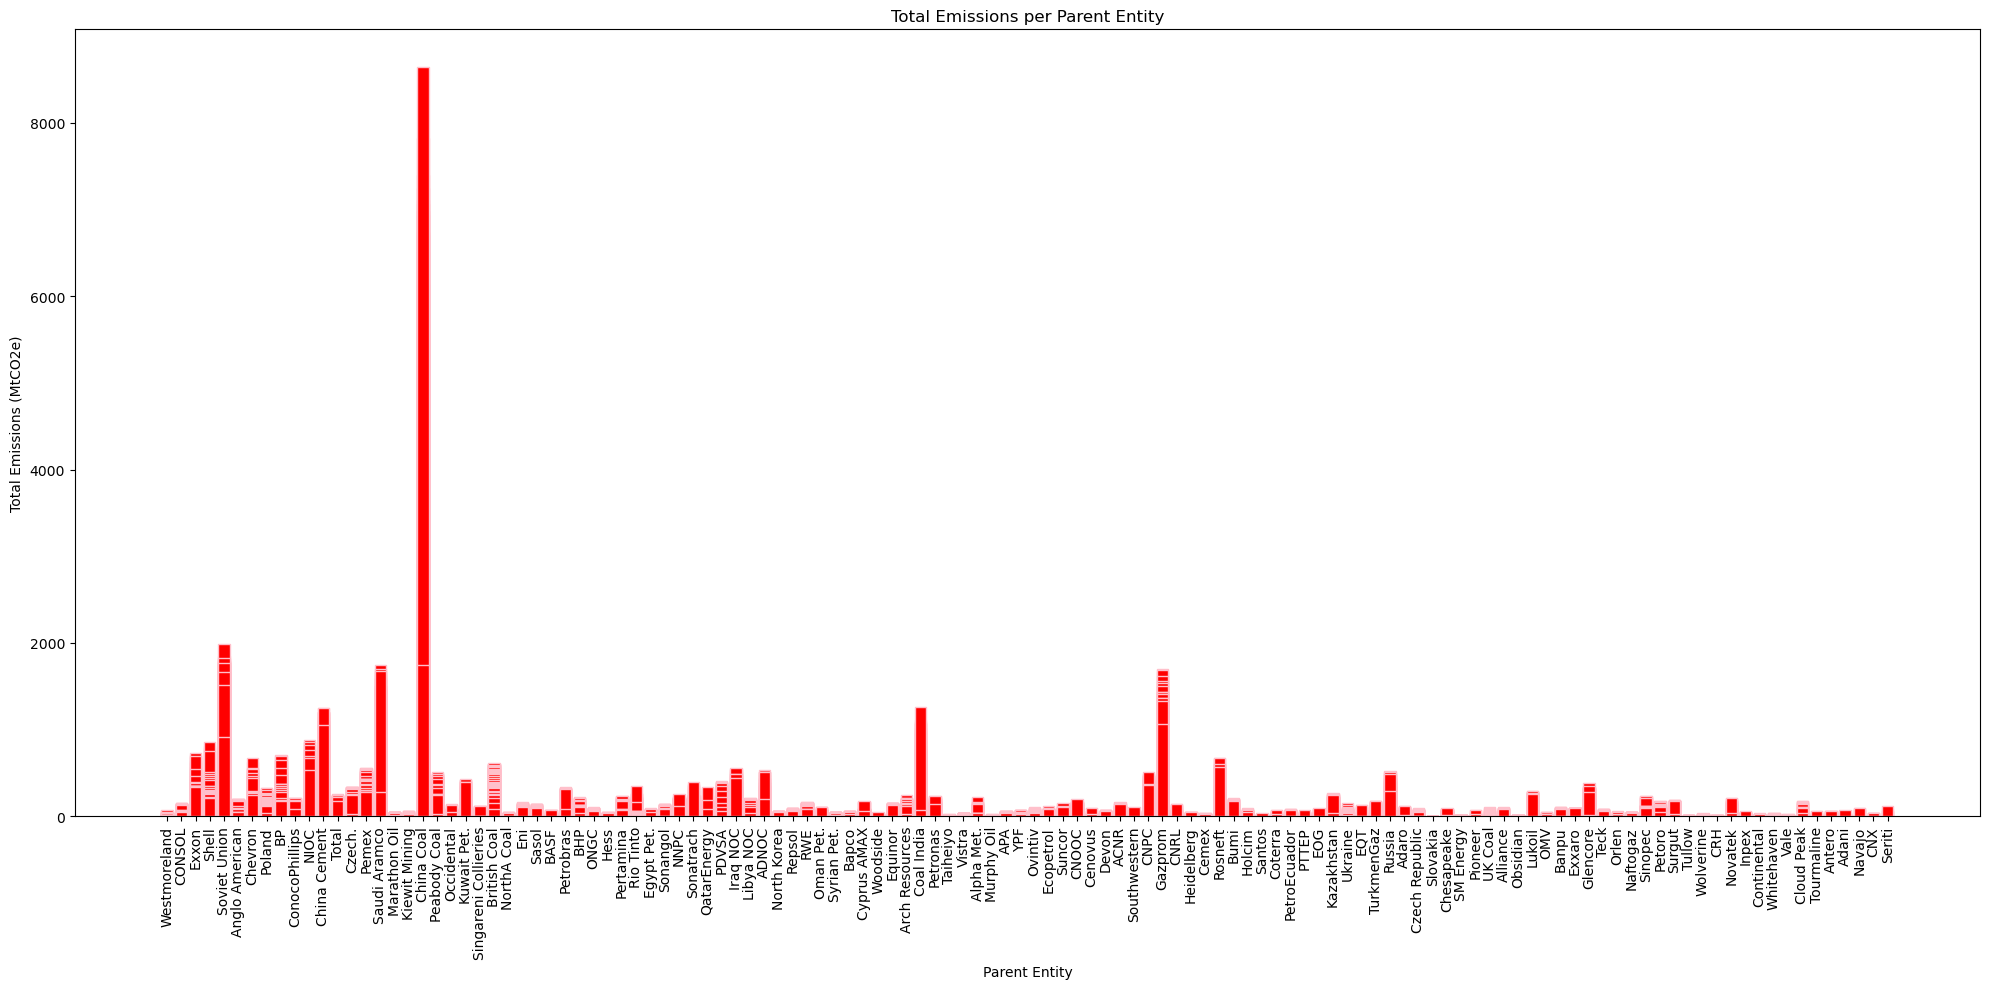

In [118]:
x = e_high.parent_short
y = e_high.total_emissions_MtCO2e

plt.figure(figsize=(20, 10))
plt.bar(x, y, color='r', align='center', edgecolor='pink', lw=1)

plt.title('Total Emissions per Parent Entity')
plt.xlabel('Parent Entity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.tight_layout() 

plt.show()

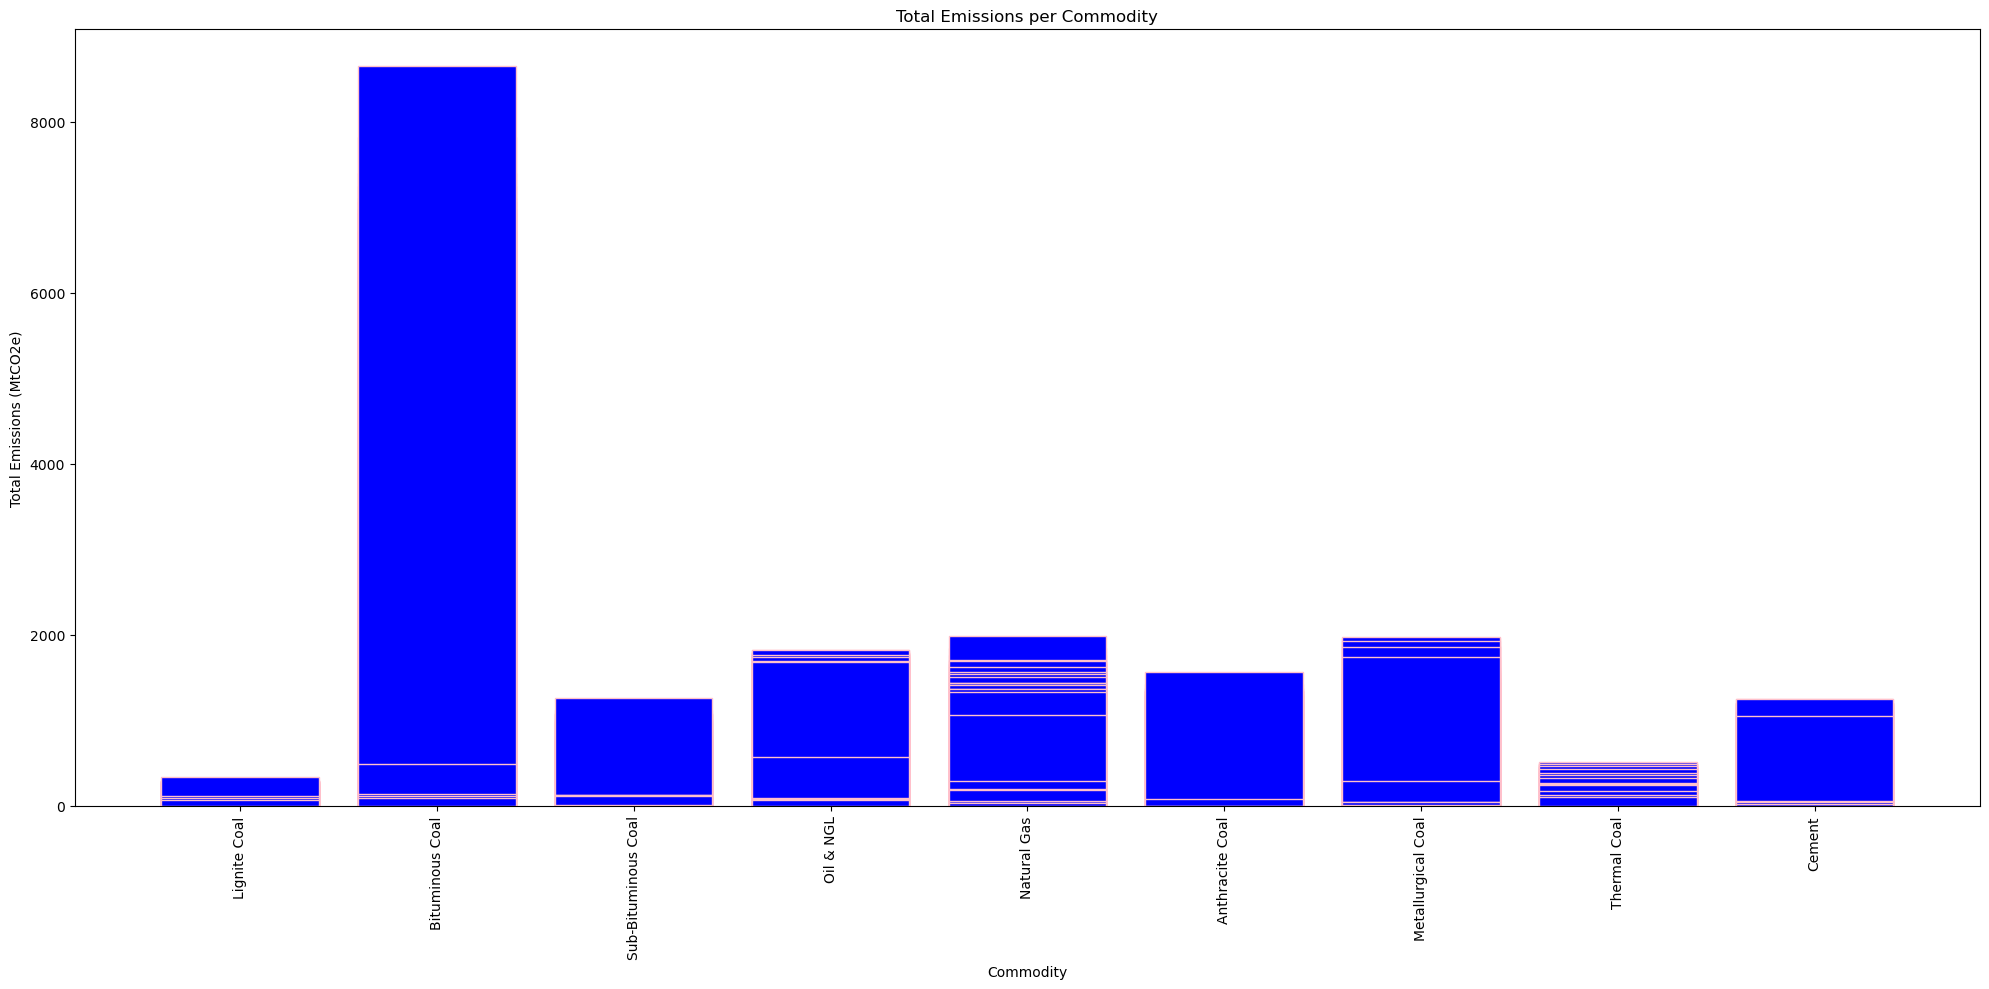

In [120]:
x = e_high.commodity
y = e_high.total_emissions_MtCO2e

plt.figure(figsize=(20, 10))
plt.bar(x, y, color='b', align='center', edgecolor='pink', lw=1)

plt.title('Total Emissions per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.tight_layout() 

plt.show()

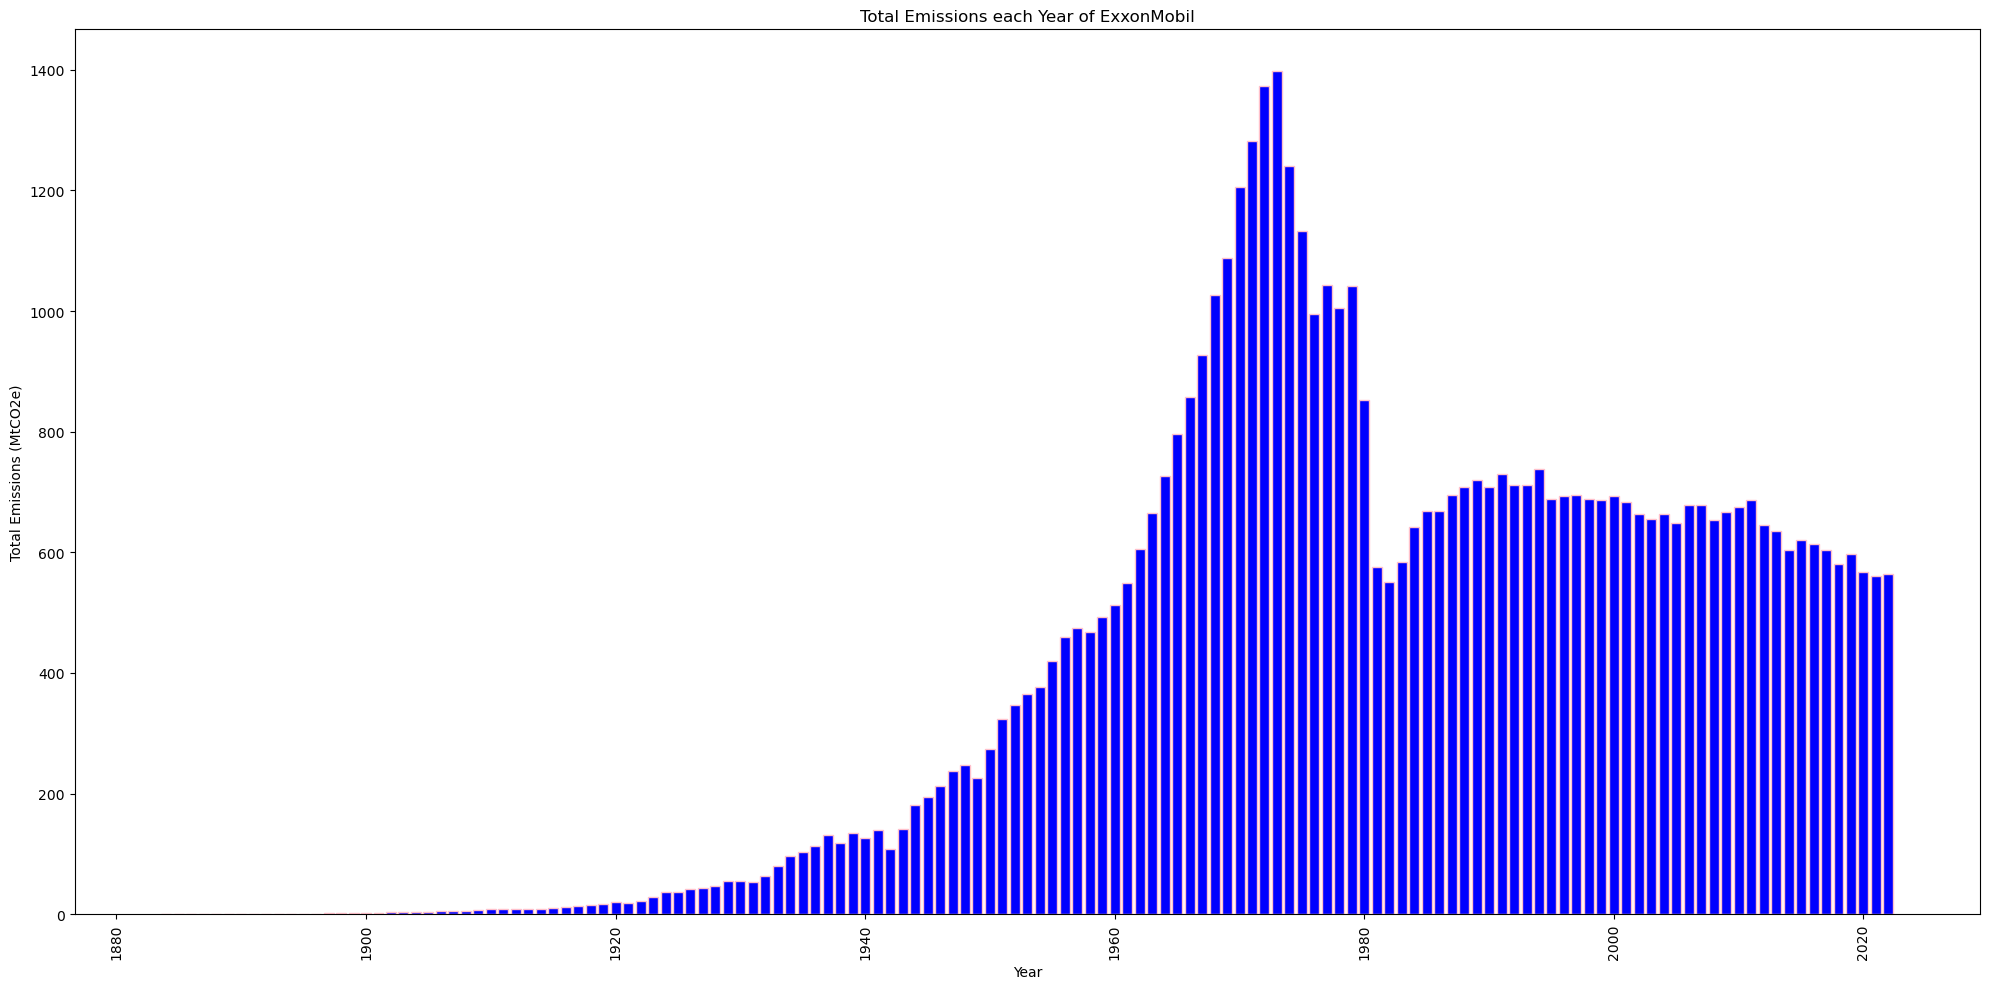

In [124]:
parent_entity = 'ExxonMobil'

filtered_df = e_high[e_high['parent_entity'] == parent_entity]
yearly_emissions = filtered_df.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()


x = yearly_emissions.year
y = yearly_emissions.total_emissions_MtCO2e

plt.figure(figsize=(20, 10))
plt.bar(x, y, color='b', align='center', edgecolor='pink', lw=1)

plt.title(f'Total Emissions each Year of {parent_entity}')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.tight_layout() 

plt.show()